In [19]:
# Script for outputting daily usage accross days, seasons, weeks, etc.

import pandas as pd
import numpy as np
import geopy.distance
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_csv("metro-bike-share-trip-data.csv")
monthly_usage = {}
flex_usage = {}
staff_usage = {}
walk_usage = {}
sanitized_df = df.dropna(subset=["Passholder Type", 'Start Time'])

def increm_week(day):
    for day_k in daily_usage.keys():
        if abs((day - day_k).days) <= 3:
            daily_usage[day_k] += 1
            break
    else:
        daily_usage[day] = 1

def increm_day(day, table):
    if day in table:
        table[day] += 1
    else:
        table[day] = 1

def str_to_date(string):
    return datetime.strptime(string, "%Y-%m-%d")

for _, row in sanitized_df.iterrows():
    day = str_to_date(row["Start Time"].split("T")[0]) # We only care about the day
    if row["Passholder Type"] == "Monthly Pass":
        increm_day(day, monthly_usage)
    elif row["Passholder Type"] == "Flex Pass":
        increm_day(day, flex_usage)
    elif row["Passholder Type"] == "Staff Annual":
        increm_day(day, staff_usage)
    elif row["Passholder Type"] == "Walk-up":
        increm_day(day, walk_usage)
    

/Users/alechin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


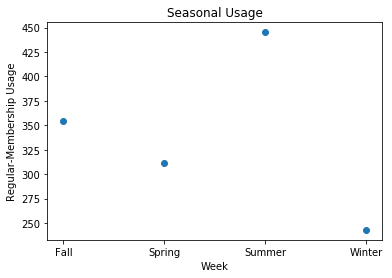

In [20]:
seasonal_usage = {"Spring":0, "Summer":0, "Fall":0, "Winter":0}
day_count = {"Spring":0, "Summer":0, "Fall":0, "Winter":0}
for k, v in daily_usage.items():
    to_place = k.timetuple().tm_yday
    if to_place in range(80, 172):
        seasonal_usage["Spring"] += v
        day_count["Spring"] += 1
    elif to_place in range(172, 264):
        seasonal_usage["Summer"] += v
        day_count["Summer"] += 1
    elif to_place in range(264, 355):
        seasonal_usage["Fall"] += v
        day_count["Fall"] += 1
    else:
        seasonal_usage["Winter"] += v
        day_count["Winter"] += 1

for k, v in seasonal_usage.items():
    seasonal_usage[k] = seasonal_usage[k] / day_count[k]

plt.scatter(seasonal_usage.keys(), seasonal_usage.values())
plt.xlabel("Week")
plt.ylabel("Regular-Membership Usage")
plt.title("Seasonal Usage")
fig = plt.gcf()
fig.savefig("bike_usage_seasonally.png")

In [21]:
day_count = {'Fall': 91, 'Spring': 11, 'Summer': 75, 'Winter': 91}

In [22]:
seasonal_usage = {"Spring":[0] * 4, "Summer":[0] * 4, "Fall":[0] * 4, "Winter":[0] * 4}

for idx, struct in enumerate([monthly_usage, flex_usage, staff_usage, walk_usage]):
    for k, v in struct.items():
        to_place = k.timetuple().tm_yday
        if to_place in range(80, 172):
            seasonal_usage["Spring"][idx] += v
        elif to_place in range(172, 264):
            seasonal_usage["Summer"][idx] += v
        elif to_place in range(264, 355):
            seasonal_usage["Fall"][idx] += v
        else:
            seasonal_usage["Winter"][idx] += v

for k, v in seasonal_usage.items():
    for x in range(4):
        seasonal_usage[k][x] = seasonal_usage[k][x] / day_count[k]

In [23]:
seasonal_usage

{'Fall': [317.84615384615387,
  33.2967032967033,
  3.4945054945054945,
  158.28571428571428],
 'Spring': [274.1818181818182, 37.09090909090909, 0.0, 149.0],
 'Summer': [391.5733333333333, 53.64, 0.0, 203.8],
 'Winter': [219.73626373626374,
  22.593406593406595,
  0.7032967032967034,
  108.74725274725274]}

In [24]:
monthly = [317.84615384615387, 274.1818181818182, 391.5733333333333, 219.73626373626374]
flex = [33.2967032967033, 37.09090909090909, 53.64, 22.593406593406595]
walk = [158.28571428571428, 149, 203.8, 108.74725274725274]